Cats & Dogs Tutorial : train a small network
(Adapted from François Chollet GitHub/classifier_from_little_data_scipt_1.py)

THALES DMS France, 2019, Atelier ALLOHA du 15/01/2019

Import lib

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import matplotlib.pyplot as plt

/home/user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Database

In [2]:
train_data_dir = '/home/user/privatedata/DogVsCat/smallDB/train'
validation_data_dir = '/home/user/privatedata/DogVsCat/smallDB/test'
nb_train_samples = 2000
nb_validation_samples = 800

Images dimensions

In [3]:
img_width, img_height = 150, 150
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

Training parameters

In [4]:
epochs = 50
batch_size = 16

CNN architecture

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
__________

Compiler

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Data

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


Training

In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/50
125/125 [==============================] - 12s 98ms/step - loss: 0.7131 - acc: 0.5360 - val_loss: 0.6824 - val_acc: 0.6312
Epoch 2/50
125/125 [==============================] - 10s 81ms/step - loss: 0.6830 - acc: 0.5685 - val_loss: 0.6812 - val_acc: 0.5675
Epoch 3/50
125/125 [==============================] - 10s 82ms/step - loss: 0.6566 - acc: 0.6270 - val_loss: 0.6443 - val_acc: 0.6250
Epoch 4/50
125/125 [==============================] - 10s 82ms/step - loss: 0.6276 - acc: 0.6660 - val_loss: 0.6189 - val_acc: 0.6512
Epoch 5/50
125/125 [==============================] - 10s 81ms/step - loss: 0.6039 - acc: 0.6735 - val_loss: 0.5852 - val_acc: 0.6925
Epoch 6/50
125/125 [==============================] - 10s 82ms/step - loss: 0.5807 - acc: 0.6940 - val_loss: 0.5697 - val_acc: 0.7050
Epoch 7/50
125/125 [==============================] - 10s 83ms/step - loss: 0.5755 - acc: 0.7060 - val_loss: 0.5304 - val_acc: 0.7338
Epoch 8/50
125/125 [==============================] - 10s 82ms

Plot

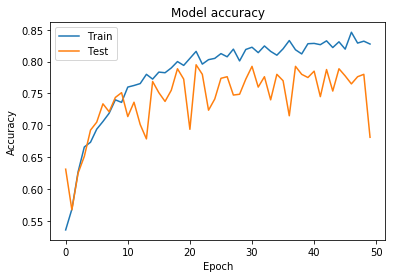

In [10]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

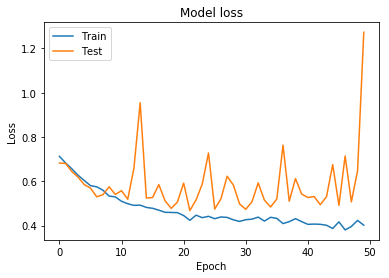

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Save model

In [12]:
model.save_weights('smallnet.h5')